# Задание 1.3.1

Условие

```
Задайте 4 точки в трехмерном пространстве, рассчитайте между ними
расстояния по описанным в примере выше метрикам. Отобразите точки
в трехмерном пространстве.
```



p1: [8 9 7]
p2: [3 2 2]
p3: [5 6 1]
p4: [9 1 6]

p1 и p2
Евклидово растсояние 9.9498743710662
Квадратное расстояние Евклида 99
Расстояние Чебышева 7
Расстояние Хемминга 17

p1 и p3
Евклидово растсояние 7.3484692283495345
Квадратное расстояние Евклида 54
Расстояние Чебышева 6
Расстояние Хемминга 12

p1 и p4
Евклидово растсояние 8.12403840463596
Квадратное расстояние Евклида 66
Расстояние Чебышева 8
Расстояние Хемминга 10

p2 и p3
Евклидово растсояние 4.58257569495584
Квадратное расстояние Евклида 21
Расстояние Чебышева 4
Расстояние Хемминга 7

p2 и p4
Евклидово растсояние 7.280109889280518
Квадратное расстояние Евклида 53
Расстояние Чебышева 6
Расстояние Хемминга 11

p3 и p4
Евклидово растсояние 8.12403840463596
Квадратное расстояние Евклида 66
Расстояние Чебышева 5
Расстояние Хемминга 14


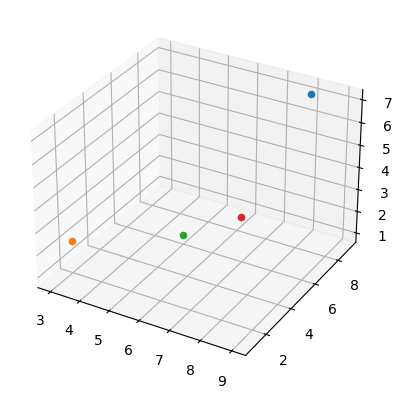

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def squared_euclidian_distance(v1, v2):
  return sum((x - y) ** 2 for x, y in zip(v1, v2))

def euclidian_distance(v1, v2):
  return squared_euclidian_distance(v1, v2) ** 0.5

def chebyshev_distance(v1, v2):
  return max(abs(x - y) for x, y in zip(v1, v2))

def manhattan_distance(v1, v2):
  return sum(abs(x - y) for x, y in zip(v1, v2))


fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

rng = np.random.default_rng()

p1 = np.array(rng.integers(1, 10, 3))
p2 = np.array(rng.integers(1, 10, 3))
p3 = np.array(rng.integers(1, 10, 3))
p4 = np.array(rng.integers(1, 10, 3))

ps = [p1, p2, p3, p4]
[print(f"p{i + 1}: {ps[i]}") for i in range(len(ps))]

for i in range(4):
  for j in range(i, 4):
    if i == j:
      continue
    print()

    print(f"p{i + 1} и p{j + 1}")
    print("Евклидово растсояние", euclidian_distance(ps[i], ps[j]))
    print("Квадратное расстояние Евклида", squared_euclidian_distance(ps[i], ps[j]))
    print("Расстояние Чебышева", chebyshev_distance(ps[i], ps[j]))
    print("Расстояние Хемминга", manhattan_distance(ps[i], ps[j]))


ax.scatter(p1[0], p1[1], p1[2])
ax.scatter(p2[0], p2[1], p2[2])
ax.scatter(p3[0], p3[1], p3[2])
ax.scatter(p4[0], p4[1], p4[2])

plt.show()

# Задание 2.3.1




```
Для предыдущего примера поэкспериментируйте с параметрами
классификатора:
1. Установите другое количество ближайших соседей (k = 1, 5, 10).
2. Установите размер тестовой выборки 15% от всего датасета.
3. Постройте графики и оцените качество моделей, проанализируйте
результаты.
```



K = 1
accuracy: 0.913
K = 5
accuracy: 0.913
K = 10
accuracy: 0.957


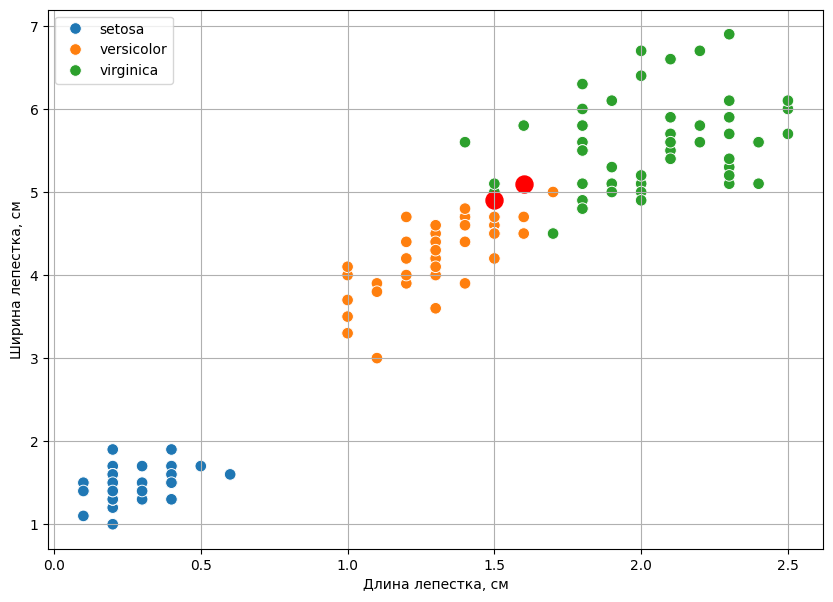

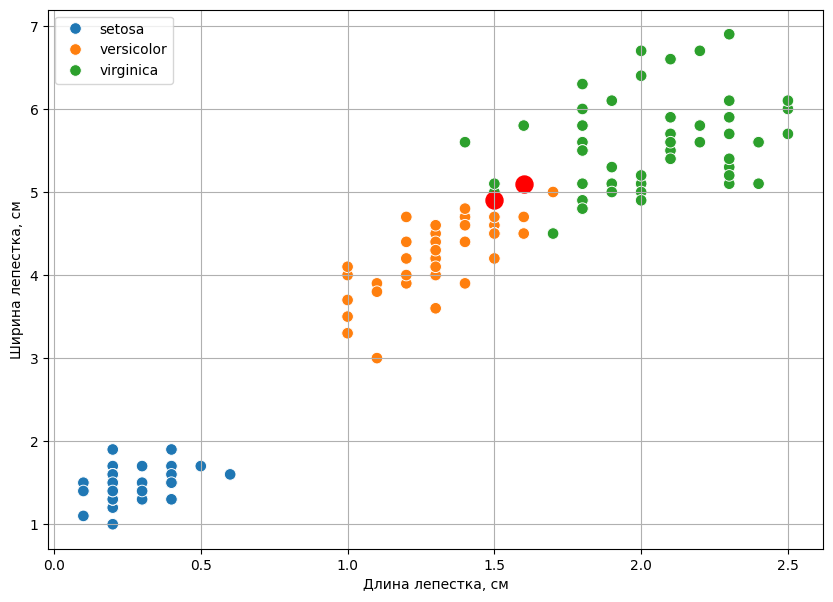

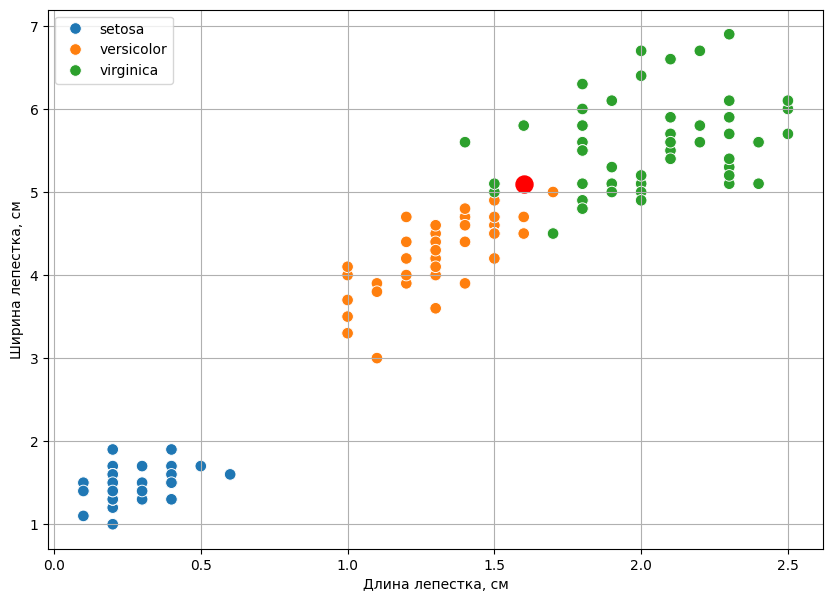

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

iris = sns.load_dataset('iris')

X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:, :-1],
    iris.iloc[:, -1],
    test_size = 0.15
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train.head()
y_train.head()

for K in [1, 5, 10]:
  print(f"K = {K}")
  model = KNeighborsClassifier(n_neighbors=K)
  model.fit(X_train, y_train)
  model

  y_pred = model.predict(X_test)
  y_pred

  plt.figure(figsize=(10, 7))
  sns.scatterplot(data=iris, x='petal_width', y='petal_length', hue='species', s=70)

  plt.xlabel('Длина лепестка, см')
  plt.ylabel('Ширина лепестка, см')
  plt.legend(loc=2)
  plt.grid()

  for i in range(len(y_test)):
      if np.array(y_test)[i] != y_pred[i]:
          plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)

  print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')

# Задание 3.3.2

```
Определите набор признаков человека, по аналогии из РТ 1, – например,
цвет глаз и конвертируйте его в матрицу признаков.
```



In [ ]:
from sklearn.feature_extraction import DictVectorizer
data_dict = [{"Карие": 5, "Голубые": 6},
             {"Карие": 4, "Зелёные": 3},
             {"Красные": 3, "Зелёные": 2},
             {"Красные": 2, "Голубые": 5}]

dictVectorizer = DictVectorizer(sparse=False)
features = dictVectorizer.fit_transform(data_dict)
features

array([[6., 0., 5., 0.],
       [0., 3., 4., 0.],
       [0., 2., 0., 3.],
       [5., 0., 0., 2.]])